## Check List 7.1. Demo - White board sweeping
* In this demo file, we will use two robots (Indy7, Panda) to sweep a white board, removing obstacles

* You need trained model to use ReachChecker
  - model/reach_svm/indy7.json
  - model/reach_svm/panda.json
  - 백업: 개인 이동식 하드디스크, 강준수

### Prepare the task scene
* Prepare Indy7 and panda, and install sweeping tool to indy. (Check release/Figs/7.1.WhiteBoardSweeping.jpg)
* Prepare "floor", "track", "box1", "box2" objects as defined in pkg.detector.aruco.marker_config.py
* The robots and "track" are installed on "floor".
* "box1" and "box2" are on "track"
<img src="../Figs/7.1.WhiteBoardSweeping.jpg" width="80%">

## set running directory to project source

In [1]:
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init combined robot config

In [2]:
from pkg.controller.combined_robot import *
from pkg.project_config import *

crob = CombinedRobot(robots_on_scene=[
    RobotConfig(0, RobotType.indy7, ((0.3,-0.4,0), (0,0,np.pi/2)),
                INDY_IP),
    RobotConfig(1, RobotType.panda, ((-0.3,-0.4,0), (0,0,np.pi/2)),
                "{}/{}".format(PANDA_REPEATER_IP, PANDA_ROBOT_IP))]
              , connection_list=[False, False])

connection command:
indy0: False
panda1: False


In [3]:
from pkg.detector.aruco.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
aruco_map = get_aruco_map()
stereo = ArucoStereo(aruco_map, [Kinect(), RealSense()])
stereo.initialize()
stereo.calibrate()

Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.


Start streaming


[(array([[1.82983423e+03, 0.00000000e+00, 1.91572046e+03],
         [0.00000000e+00, 1.82983423e+03, 1.09876086e+03],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([ 7.09966481e-01, -2.73409390e+00,  1.45804870e-03, -3.24774766e-04,
          1.44911301e+00,  5.84310412e-01, -2.56374550e+00,  1.38472950e+00])),
 (array([[1.39560388e+03, 0.00000000e+00, 9.62751587e+02],
         [0.00000000e+00, 1.39531934e+03, 5.47687012e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([0., 0., 0., 0., 0.])),
 array([[ 0.8259723 , -0.02335597, -0.56322664,  0.64955115],
        [ 0.17117706,  0.9623539 ,  0.21112424, -0.15982892],
        [ 0.5370923 , -0.27079427,  0.79887563,  0.09111983],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32)]

## create scene builder

In [4]:
from pkg.geometry.builder.scene_builder import SceneBuilder
s_builder = SceneBuilder(stereo)
s_builder.reset_reference_coord(ref_name="floor")

## detect robot and make geometry scene

In [5]:
xyz_rpy_robots = s_builder.detect_items(level_mask=[DetectionLevel.ROBOT])
crob.update_robot_pos_dict(xyz_rpy_robots=xyz_rpy_robots)
gscene = s_builder.create_gscene(crob)

Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


Please create a subscriber to the marker
publication OK
published: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## init planning pipeline

In [6]:
from pkg.planning.scene import PlanningScene
pscene = PlanningScene(gscene, combined_robot=crob)

from pkg.planning.pipeline import PlanningPipeline
ppline = PlanningPipeline(pscene)

from pkg.ui.ui_broker import *

# start UI
ui_broker = UIBroker.instance()
ui_broker.initialize(ppline, s_builder)
ui_broker.start_server()

ui_broker.set_tables()

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "pkg.ui.dash_launcher" (lazy loading)
 * Environment: production


```
open web ui on <your ip>:8050
click geometry items / Handles / Binders to highlight geometry on RVIZ
other functions may be buggy.. please report
```

## add environment

In [7]:
gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.ENVIRONMENT])

   Use a production WSGI server instead.
 * Debug mode: off
Please create a subscriber to the marker


In [8]:
# add cam poles
ptems = s_builder.add_poles({"cam0": s_builder.ref_coord_inv[:3,3], "cam1":np.matmul(s_builder.ref_coord_inv, stereo.T_c12)[:3,3]},
                            color=(0.6,0.6,0.6,0.0))

In [9]:
gtems = s_builder.add_robot_geometries(color=(0,1,0,0.5), display=True, collision=True)

In [10]:
 gscene.NAME_DICT["floor"].dims = (2,1,0.01)

In [11]:
gscene.set_workspace_boundary( -1, 1, -0.5, 0.5, -0.1, 1.1)

## add sweep face

In [12]:
track = s_builder.detect_and_register(item_names=["track"], level_mask=[DetectionLevel.ENVIRONMENT])["track"]
track_face = gscene.copy_from(track, new_name="track_face", collision=False)
track_face.dims = (track.dims[0]-0.22, track.dims[1]-0.12, track.dims[2])
# track.dims = (track.dims[0]-0.32, track.dims[1]-0.12, track.dims[2])

In [13]:
gscene.update_markers_all()

## add wp

In [14]:
TOOL_DIM = [0.06, 0.10]
TRACK_DIM = track_face.dims
TRACK_NUM = np.ceil(np.divide(TRACK_DIM[1]-TOOL_DIM[1], TOOL_DIM[1])).astype(np.int)+1
TRACK_STEP = (TRACK_DIM[1]-TOOL_DIM[1])/(TRACK_NUM-1)
WP_REF_A = -np.subtract(TRACK_DIM[:2], TOOL_DIM[:2])/2
WP_REF_B = np.array([-WP_REF_A[0], WP_REF_A[1]])
TRC_THIC = TRACK_DIM[2]
track_list = []
for i_trc in range(TRACK_NUM):
    wp1 = gscene.create_safe(GEOTYPE.BOX, "wp{}a".format(i_trc+1), "base_link", (TOOL_DIM[0]/2,TOOL_DIM[1]/2,TRC_THIC), 
                             tuple(WP_REF_A+[0,TRACK_STEP*i_trc])+(0,),rpy=(0,0,0), 
                             color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
    wp2 = gscene.create_safe(GEOTYPE.BOX, "wp{}b".format(i_trc+1), "base_link", (TOOL_DIM[0]/2,TOOL_DIM[1]/2,TRC_THIC), 
                             tuple(WP_REF_B+[0,TRACK_STEP*i_trc])+(0,),rpy=(0,0,0), 
                             color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
    track_list.append((wp1, wp2))

In [15]:
gscene.update_markers_all()

## add indy tool

In [16]:
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="indy0_fts", link_name="indy0_tcp",
                            center=(0,0,0.02), dims=(0.07,0.07, 0.04), rpy=(0,0,0), color=(0.8,0.8,0.8,1),
                            collision=False)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="indy0_fts_col", link_name="indy0_tcp",
                            center=(0,0,0.02), dims=(0.11,0.11, 0.04), rpy=(0,0,0), color=(0.0,0.8,0.0,0.5),
                            collision=True)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="indy0_pole", link_name="indy0_tcp",
                            center=(0,0,0.055), dims=(0.03,0.03, 0.030), rpy=(0,0,0), color=(0.8,0.8,0.8,1),
                            collision=False)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="indy0_pole_col", link_name="indy0_tcp",
                            center=(0,0,0.055), dims=(0.07,0.07, 0.030), rpy=(0,0,0), color=(0.0,0.8,0.0,0.2),
                            collision=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="indy0_brushbase", link_name="indy0_tcp",
                            center=(0,0,0.0775), dims=(0.06, 0.14, 0.015), rpy=(0,0,0), color=(0.8,0.8,0.8,1),
                            collision=False)
gscene.create_safe(gtype=GEOTYPE.BOX, name="brush_face", link_name="indy0_tcp",
                            center=(0,0,0.095), dims=(0.05,0.13, 0.015), rpy=(0,0,0), color=(1.0,1.0,0.94,1),
                            collision=False)
gscene.create_safe(gtype=GEOTYPE.BOX, name="brush_face_col", link_name="indy0_tcp",
                            center=(0,0,0.080), dims=(0.08,0.18, 0.02), rpy=(0,0,0), color=(0.0,0.8,0.0,0.5),
                            collision=True)

## add box

In [17]:
gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.MOVABLE])

In [18]:
# give clearance from the track surface
s_builder.give_clearance(track, gtem_dict.values())

In [19]:
gscene.update_markers_all()

## Register binders

In [20]:
from pkg.planning.constraint.constraint_actor import Gripper2Tool, PlacePlane, SweepFramer, FixtureSlot

In [21]:
gscene.create_safe(gtype=GEOTYPE.SPHERE, name="grip1", link_name="panda1_hand", 
                 dims=(0.01,)*3, center=(0,0,0.112), rpy=(-np.pi/2,0,0), color=(1,0,0,1), display=True, collision=False, fixed=True)

pscene.create_binder(bname="grip1", gname="grip1", _type=Gripper2Tool, point=(0,0,0), rpy=(0,0,0))
pscene.create_binder(bname="track_face", gname="track_face", _type=PlacePlane)
pscene.create_binder(bname="brush_face", gname="brush_face", _type=SweepFramer, point=(0,0,0.00), 
                     rpy=(0,np.pi,0))

## add objects

In [22]:
from pkg.planning.constraint.constraint_subject import \
        CustomObject, Grasp2Point, PlacePoint, SweepFrame, SweepTask, BoxObject, FixturePoint, AbstractObject

In [23]:
box1 = pscene.create_subject(oname="box1", gname="box1", _type=BoxObject, hexahedral=True)
box2 = pscene.create_subject(oname="box2", gname="box2", _type=BoxObject, hexahedral=True)
# box3= pscene.create_subject(oname="box3", gname="box3", _type=BoxObject, hexahedral=True)

In [24]:
from pkg.planning.constraint.constraint_common import MotionConstraint
from pkg.planning.constraint.constraint_subject import AbstractTask
from pkg.planning.constraint.constraint_subject import SweepLineTask

In [25]:
sweep_list = []
for i_t, track_tem in enumerate(track_list):
    wp1, wp2 = track_tem
    sweep_ = pscene.create_subject(oname="sweep{}".format(i_t+1), gname="track_face", _type=SweepLineTask, 
                                 action_points_dict = {wp1.name: SweepFrame(wp1.name, wp1, [0,0,0.005], [0,0,0]),
                                                       wp2.name: SweepFrame(wp2.name, wp2, [0,0,0.005], [0,0,0])})
    sweep_list.append(sweep_)

### planners

In [26]:
from pkg.planning.motion.moveit.moveit_planner import MoveitPlanner
mplan = MoveitPlanner(pscene)
mplan.update_gscene()
from pkg.planning.task.rrt import TaskRRT
tplan = TaskRRT(pscene)
tplan.prepare()
ppline.set_motion_planner(mplan)
ppline.set_task_planner(tplan)

## motion filters

In [27]:
from pkg.planning.filtering.grasp_filter import GraspChecker
from pkg.planning.filtering.reach_filter import ReachChecker
from pkg.planning.filtering.latticized_filter import LatticedChecker

gcheck = GraspChecker(pscene)
rcheck = ReachChecker(pscene)
checkers_all = [gcheck, rcheck]
# lcheck = LatticedChecker(pscene, gcheck)
# checkers_all.append(lcheck)

In [28]:
mplan.motion_filters = checkers_all

In [29]:
gscene.show_pose(crob.home_pose)

## Set initial condition

In [30]:
from pkg.planning.constraint.constraint_common \
            import sample_redundancy, combine_redundancy
gtimer = GlobalTimer.instance()
initial_state = pscene.update_state(crob.home_pose)
print(initial_state.node)

('track_face', 'track_face', 0, 0, 0)


In [31]:
pscene.subject_name_list

['box1', 'box2', 'sweep1', 'sweep2', 'sweep3']

# Node Sampler

In [32]:
from pkg.planning.sampling.node_sampling import make_state_param_hashable, UniformNodeSampler, PenaltyNodeSampler, GrowingSampler

tplan.new_node_sampler = PenaltyNodeSampler(3, 1)
tplan.parent_node_sampler = UniformNodeSampler(3)
# tplan.parent_snode_sampler = GrowingSampler(3)

# CustomRule

In [33]:
from pkg.planning.task.custom_rules.sweep_entrance_control import SweepEntranceControlRule
tplan.custom_rule = SweepEntranceControlRule(pscene)

## Plan

In [34]:
from pkg.planning.motion.moveit.moveit_py import ConstrainedSpaceType
mplan.reset_log(False)
gtimer.reset()
# goal_nodes = [("track_face","grip1")+(0,0,0)]
goal_nodes = [("track_face","track_face")+tuple([2 for _ in range(TRACK_NUM)])]
# goal_nodes = [("floor","floor","floor", 2, 2, 2)]
gtimer.tic("plan")
ppline.search(initial_state, goal_nodes, verbose=True, display=False, dt_vis=0.01, 
              timeout_loop=200, multiprocess=True, timeout=5,  
              plannerconfig=PlannerConfig.RRTConnectkConfigDefault, cs_type=ConstrainedSpaceType.TANGENTBUNDLE)
gtimer.toc("plan")
schedules = ppline.tplan.find_schedules()
schedules_sorted = ppline.tplan.sort_schedule(schedules)
snode_schedule = ppline.tplan.idxSchedule2SnodeScedule(schedules_sorted[0])

Use 20/20 agents
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'track_face', 1, 0, 0)
try transition motion
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0)
result: 0 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0) = fail
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0)
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0)
result: 0 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0) = fail
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0)
result: 0 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0) = fail
result: 0 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0) = fail
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0)
try: 0 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0)
result: 0 - ('track_face'

try: 7 - ('grip1', 'track_face', 0, 0, 0)->('grip1', 'track_face', 1, 0, 0)
result: 4 - ('grip1', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0) = success
branching: 4->7 (0.79/200.0 s, steps/err: 55(66.987991333 ms)/6.12657845385e-16)
try: 3 - ('grip1', 'track_face', 0, 0, 0)->('track_face', 'track_face', 0, 0, 0)
try transition motion
result: 3 - ('grip1', 'track_face', 0, 0, 0)->('track_face', 'track_face', 0, 0, 0) = fail
joint motion tried: True
result: 5 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'track_face', 0, 0, 0) = success
try: 8 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'track_face', 1, 0, 0)
branching: 5->8 (0.81/200.0 s, steps/err: 75(88.8049602509 ms)/6.79937446048e-16)
result: 8 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'track_face', 1, 0, 0) = fail
try: 3 - ('grip1', 'track_face', 0, 0, 0)->('track_face', 'track_face', 0, 0, 0)
try: 6 - ('grip1', 'track_face', 0, 0, 0)->('track_face', 'track_face', 0, 0, 0)
result: 3 

try: 16 - ('grip1', 'track_face', 2, 0, 0)->('grip1', 'track_face', 2, 1, 0)
result: 11 - ('grip1', 'track_face', 2, 0, 0)->('grip1', 'track_face', 2, 1, 0) = success
result: 12 - ('grip1', 'track_face', 2, 0, 0)->('grip1', 'track_face', 2, 1, 0) = success
branching: 12->18 (1.34/200.0 s, steps/err: 57(231.112957001 ms)/0.000827582431312)
result: 11 - ('grip1', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0) = fail
result: 12 - ('grip1', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0) = fail
try: 18 - ('grip1', 'track_face', 2, 1, 0)->('grip1', 'track_face', 2, 2, 0)
branching: 11->17 (1.35/200.0 s, steps/err: 24(229.463815689 ms)/0.00176445411649)
try: 11 - ('grip1', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0)
try: 14 - ('grip1', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0)
try transition motion
try: 17 - ('grip1', 'track_face', 2, 1, 0)->('grip1', 'track_face', 2, 2, 0)
try: 12 - ('grip1', 'track_face', 2, 0, 0)->('track_

result: 8 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0) = fail
result: 20 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0) = fail
try: 15 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0)
try: 15 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0)
try: 15 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0)
try transition motion
try: 20 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0)
try transition motion
try: 5 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0)
result: 20 - ('track_face', 'track_face', 0, 0, 0)->('grip1', 'track_face', 0, 0, 0) = fail
joint motion tried: True
transition motion tried: True
result: 13 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'track_face', 0, 0, 0) = success
result: 16 - ('grip1', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0) = success
branching: 13->21 (1.7

result: 25 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0) = success
try: 28 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 1, 0, 0)
try: 29 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 1, 0, 0)
result: 22 - ('track_face', 'track_face', 2, 0, 0)->('track_face', 'grip1', 2, 0, 0) = fail
try: 22 - ('track_face', 'track_face', 2, 0, 0)->('grip1', 'track_face', 2, 0, 0)
branching: 25->29 (2.13/200.0 s, steps/err: 51(131.829977036 ms)/4.4559675789e-16)
try joint motion
try transition motion
joint motion tried: True
try transition motion
result: 22 - ('track_face', 'track_face', 2, 0, 0)->('grip1', 'track_face', 2, 0, 0) = fail
result: 22 - ('track_face', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0) = success
try: 30 - ('track_face', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 1, 0)
branching: 22->30 (2.19/200.0 s, steps/err: 60(413.138866425 ms)/1.1624290686e-15)
try: 23 - ('track_face', 'track_face', 2, 0, 0)->('

try: 42 - ('track_face', 'grip1', 2, 0, 0)->('track_face', 'grip1', 2, 0, 0)
try: 42 - ('track_face', 'grip1', 2, 0, 0)->('track_face', 'grip1', 2, 1, 0)
try joint motion
result: 41 - ('track_face', 'grip1', 2, 1, 0)->('track_face', 'grip1', 2, 2, 0) = fail
try: 43 - ('track_face', 'grip1', 2, 0, 0)->('track_face', 'grip1', 2, 1, 0)
result: 43 - ('track_face', 'grip1', 2, 0, 0)->('track_face', 'grip1', 2, 1, 0) = fail
try transition motion
try: 23 - ('track_face', 'track_face', 2, 0, 0)->('grip1', 'track_face', 2, 0, 0)
joint motion tried: True
joint motion tried: True
try transition motion
result: 24 - ('track_face', 'track_face', 2, 0, 0)->('track_face', 'track_face', 2, 0, 0) = success
branching: 24->44 (3.03/200.0 s, steps/err: 84(1102.42486 ms)/5.93563538997e-16)
result: 42 - ('track_face', 'grip1', 2, 0, 0)->('track_face', 'grip1', 2, 0, 0) = success
transition motion tried: True
transition motion tried: True
branching: 42->45 (3.05/200.0 s, steps/err: 20(134.17506218 ms)/9.23377

result: 54 - ('track_face', 'grip1', 2, 2, 0)->('track_face', 'grip1', 2, 2, 0) = success
try: 56 - ('track_face', 'grip1', 2, 0, 0)->('track_face', 'grip1', 2, 1, 0)
result: 55 - ('grip1', 'track_face', 2, 1, 0)->('grip1', 'track_face', 2, 2, 0) = fail
transition motion tried: True
result: 54 - ('track_face', 'grip1', 2, 2, 0)->('track_face', 'grip1', 2, 2, 1) = success
result: 53 - ('track_face', 'grip1', 2, 2, 0)->('track_face', 'grip1', 2, 2, 1) = success
try transition motion
try transition motion
try: 58 - ('grip1', 'track_face', 2, 1, 0)->('grip1', 'track_face', 2, 2, 0)
branching: 53->60 (3.72/200.0 s, steps/err: 25(229.115009308 ms)/0.0012219970481)
branching: 54->61 (3.72/200.0 s, steps/err: 12(110.769033432 ms)/0.00152654962947)
branching: 54->59 (3.71/200.0 s, steps/err: 22(125.35905838 ms)/7.77066968571e-16)
try: 59 - ('track_face', 'grip1', 2, 2, 0)->('track_face', 'grip1', 2, 2, 1)
try transition motion
try: 61 - ('track_face', 'grip1', 2, 2, 1)->('track_face', 'grip1', 

try: 72 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 1, 0, 0)
joint motion tried: True
result: 69 - ('track_face', 'grip1', 2, 2, 0)->('track_face', 'grip1', 2, 2, 0) = success
try constrained motion
try joint motion
result: 72 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 1, 0, 0) = fail
branching: 69->73 (4.51/200.0 s, steps/err: 22(171.740055084 ms)/5.64792886107e-16)
try: 73 - ('track_face', 'grip1', 2, 2, 0)->('track_face', 'grip1', 2, 2, 1)
try: 67 - ('track_face', 'track_face', 2, 2, 0)->('grip1', 'track_face', 2, 2, 0)
try transition motion
try transition motion
transition motion tried: True
result: 70 - ('track_face', 'track_face', 2, 2, 0)->('track_face', 'track_face', 2, 2, 1) = success
joint motion tried: True
result: 72 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 0, 0, 0) = success
branching: 70->74 (4.7/200.0 s, steps/err: 26(256.211996078 ms)/0.00153773301731)
branching: 72->75 (4.72/200.0 s, steps/err: 77(216.629981995 ms)/1.

try: 84 - ('track_face', 'track_face', 2, 2, 2)->('track_face', 'grip1', 2, 2, 2)
try transition motion
try: 84 - ('track_face', 'track_face', 2, 2, 2)->('grip1', 'track_face', 2, 2, 2)
result: 84 - ('track_face', 'track_face', 2, 2, 2)->('track_face', 'grip1', 2, 2, 2) = fail
try: 82 - ('track_face', 'track_face', 2, 2, 2)->('track_face', 'grip1', 2, 2, 2)
result: 84 - ('track_face', 'track_face', 2, 2, 2)->('grip1', 'track_face', 2, 2, 2) = fail
try: 82 - ('track_face', 'track_face', 2, 2, 2)->('grip1', 'track_face', 2, 2, 2)
result: 82 - ('track_face', 'track_face', 2, 2, 2)->('track_face', 'grip1', 2, 2, 2) = fail
result: 82 - ('track_face', 'track_face', 2, 2, 2)->('grip1', 'track_face', 2, 2, 2) = fail
try: 84 - ('track_face', 'track_face', 2, 2, 2)->('track_face', 'grip1', 2, 2, 2)
try: 82 - ('track_face', 'track_face', 2, 2, 2)->('grip1', 'track_face', 2, 2, 2)
result: 84 - ('track_face', 'track_face', 2, 2, 2)->('track_face', 'grip1', 2, 2, 2) = fail
result: 82 - ('track_face'

branching: 82->90 (6.32/200.0 s, steps/err: 68(597.599983215 ms)/0.00126536121052)
======================= terminated 0: first answer acquired from other agent ===============================
transition motion tried: True
result: 84 - ('track_face', 'track_face', 2, 2, 2)->('grip1', 'track_face', 2, 2, 2) = success
branching: 84->91 (6.47/200.0 s, steps/err: 187(602.052927017 ms)/0.00167232549841)
======================= terminated 4: first answer acquired from other agent ===============================
transition motion tried: False
result: 21 - ('track_face', 'track_face', 0, 0, 0)->('track_face', 'track_face', 1, 0, 0) = fail
======================= terminated 3: first answer acquired from other agent ===============================
transition motion tried: False
result: 28 - ('track_face', 'grip1', 0, 0, 0)->('track_face', 'grip1', 1, 0, 0) = fail
======================= terminated 16: first answer acquired from other agent ===============================
transition motion tried: 

In [35]:
print(gtimer)

plan: 	5887.0 ms/1 = 5887.239 ms (5887.239/5887.239)



### refine schedule

In [44]:


# for sweep_ in sweep_list:
#     sweep_.fix_direction = True

# gtimer.tic("refine_trajectory")
# ppline.refine_trajectory(snode_schedule, timeout=1, timeout_constrained=2, N_try=1, max_repeat=3,
#                          plannerconfig=PlannerConfig.RRTstarkConfigDefault,  cs_type=ConstrainedSpaceType.TANGENTBUNDLE,
#                         multiprocess=True)
# gtimer.toc("refine_trajectory")

In [45]:
# for k,v in ppline.refine_success_dict.items():
#     print("{} {}: {}".format(k, snode_schedule[k].state.node, v))

In [46]:
# print(gtimer)

## play searched plan

In [36]:
gscene.clear_highlight()
ppline.play_schedule(snode_schedule[:2], period=0.001)
pscene.set_object_state(snode_schedule[0].state)
gscene.show_pose(crob.home_pose)
time.sleep(0.5)
gscene.show_pose(crob.home_pose)

In [37]:
ppline.play_schedule(snode_schedule, period=0.01)

## visualize all traj

In [38]:
gscene.clear_highlight()
effector = gscene.NAME_DICT["brush_face"]
for i_s, snode_to in enumerate(snode_schedule):
    Traj = snode_to.traj
    if Traj is None or (1 in snode_to.state.node[2:]):
        continue
    T_list = effector.draw_traj_coords(Traj, "traj_{}".format(i_s))
#     Z_all = np.array(T_list)[:,2,3]
#     print("std: {}".format(np.std(Z_all)))
#     print("minmax: {}".format(np.max(Z_all)-np.min(Z_all)))

In [39]:
gscene.clear_highlight()

In [ ]:
print("schedule length: {}".format(len(snode_schedule)))
for i_s,  snode in enumerate(snode_schedule):
#     print("{}: {}".format(i_s, snode.state.node))
    save_json("traj-{}.json".format(i_s), snode.traj)

In [ ]:
traj_list = []
for i_s in range(19):
#     print("{}: {}".format(i_s, snode.state.node))
    traj_list.append(np.array(load_json("traj-{}.json".format(i_s))))

In [ ]:
gscene.show_motion(traj_list[2], period=0.5)

## execute plan

In [158]:
crob.reset_connection(False,True)

connection command:
indy0: False
panda1: True


In [51]:
# indy = crob.robot_dict["indy0"]
panda = crob.robot_dict["panda1"]
# with indy:
#     indy.set_joint_vel_level(1)
#     indy.set_task_vel_level(1)

In [53]:
crob.joint_move_make_sure(crob.home_pose)

AttributeError: 'NoneType' object has no attribute 'joint_move_make_sure'

In [175]:
crob.grasp(indy0=True, panda1=True)
crob.grasp(indy0=False, panda1=False)

In [101]:
panda.move_joint_s_curve(RobotSpecs.get_home_pose(RobotType.panda), N_div=100)

In [174]:
panda.grasp(False)

False

In [173]:
ppline.execute_schedule(snode_schedule, vel_scale=0.5, acc_scale=1)

binder: track_face
rname: None
binder: track_face
rname: None
binder: None
binder: None
binder: None
binder: track_face
rname: None
binder: track_face
rname: None
binder: None
binder: None
binder: None
binder: track_face
rname: None
binder: grip1
rname: panda1
binder: None
binder: None
binder: None
binder: track_face
rname: None
binder: grip1
rname: panda1
binder: None
binder: None
binder: None


In [89]:
trajectory = snode_schedule[1].traj
vel_scale = 0.5
acc_scale = 1
auto_stop = True
self = crob
name, rconfig = "panda1", self.robots_on_scene[1]
_type = rconfig.type
robot = self.robot_dict[name]
traj_cur_rbt = trajectory[:,self.idx_dict[name]]
diff_abs_arr = np.abs(traj_cur_rbt - traj_cur_rbt[0:1, :])
if np.max(diff_abs_arr) > 1e-3:
    vel_limits = np.multiply(RobotSpecs.get_vel_limits(_type), vel_scale)
    acc_limits = np.multiply(RobotSpecs.get_acc_limits(_type), acc_scale)

In [90]:
self= panda
trajectory, vel_lims, acc_lims, auto_stop = traj_cur_rbt, vel_limits, acc_limits, auto_stop
trajectory = np.concatenate([[self.get_qcur()], trajectory])
with gtimer.block("calc_safe_trajectory"):
    t_all, traj_tot = calc_safe_trajectory(1.0/self.traj_freq, trajectory, vel_lims=vel_lims, acc_lims=acc_lims)

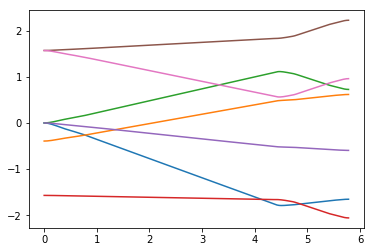

In [91]:
import matplotlib.pyplot as plt
plt.plot(t_all, traj_tot)

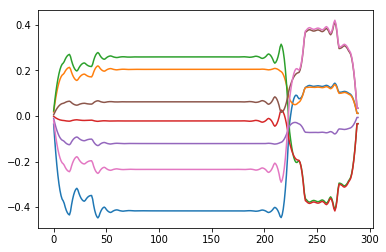

In [92]:
vel_tot = differentiate(traj_tot, 0.02)
plt.plot(vel_tot)

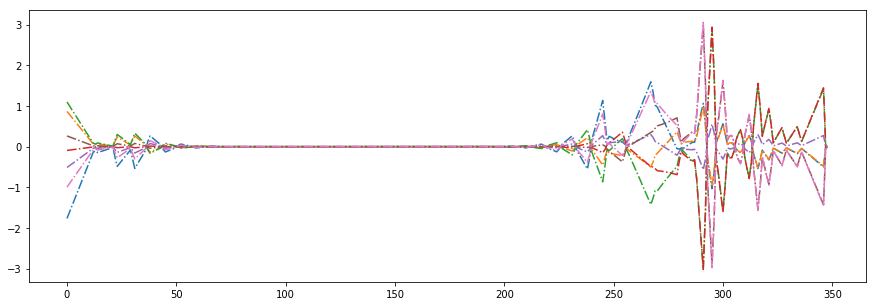

In [62]:
acc_tot = differentiate(vel_tot, 0.02)
plt.figure(figsize=(15,5))
plt.plot(acc_tot,'-.')
# plt.axis([0,500,-1,1])

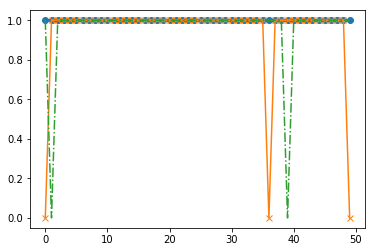

In [63]:
vel_pass, acc_pass, low_bound_pass = calc_T_list_simple.pass_list
plt.plot(vel_pass, '-o')
plt.plot(acc_pass, '-x')
plt.plot(low_bound_pass, '-.')

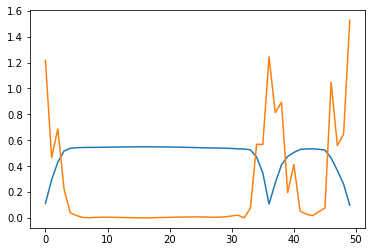

In [64]:
vel_ratio_mid, acc_ratio = calc_T_list_simple.ratio_list
plt.plot(vel_ratio_mid)
plt.plot(acc_ratio)

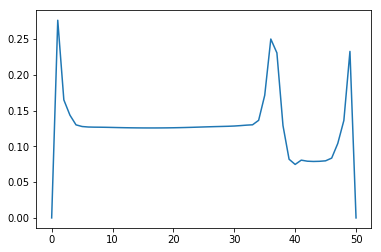

In [65]:
plt.plot(calc_T_list_simple.T_list)

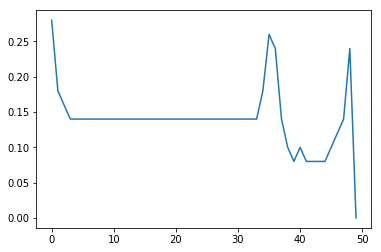

In [66]:
plt.plot(calc_safe_trajectory.T_list)

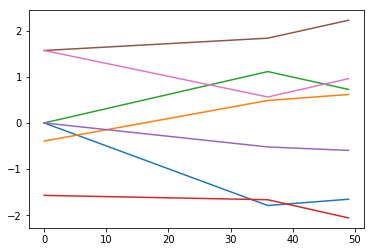

In [67]:
plt.plot(calc_safe_trajectory.Q_list)

In [177]:
len(calc_T_list_simple.T_list)

35

In [178]:
len(trajectory)

35

In [156]:


##
# @brief calculate safe waypoint-time list for a list of waypoints, by simply iterating velocity & acceleration limits
# @param trajectory list of waypoints
# @param vel_lims   velocity limits, either in vector or scalar
# @param acc_lims   acceleration limits, either in vector or scalar
def calc_T_list_simple(trajectory, vel_lims, acc_lims,
                        vel_margin_ratio=0.1, acc_margin_ratio=0.1,
                        upper_bound_ratio=1.2, low_bound_ratio=0.5):
    dq_list = np.subtract(trajectory[1:], trajectory[:-1])
    idx_skip = np.where(np.linalg.norm(dq_list, axis=-1)<1e-3)[0]
    idx_valid = np.where(np.linalg.norm(dq_list, axis=-1)>=1e-3)[0]
    dq_list = dq_list[idx_valid]
    dT_list = np.max(np.abs(dq_list)/vel_lims, axis=-1)
    dT_list_mid_pre = None
    alpha = 0.5
    for _ in range(1000):
        dT_list_pre = dT_list # between q, N-1
        vel_list = dq_list/dT_list[:,np.newaxis] # between q, N-1
        vel_list = np.pad(vel_list, ((1,1),(0,0)), 'constant', constant_values=0) # between q and expand, N+1
        dT_list = np.pad(dT_list, (1,1), 'constant', constant_values=0) # between q and expand, N+1
        dv_list = vel_list[1:]- vel_list[:-1] # on q, N
        vel_mid_list = np.abs((vel_list[1:] + vel_list[:-1])/2) # on q, N
        vel_ratio_mid = np.max(vel_mid_list/(vel_lims*(1+vel_margin_ratio)), axis=-1) # on q, N
        dT_list_mid = (dT_list[:-1]+dT_list[1:])/2 # on q, N
        acc_list = np.abs(dv_list) / dT_list_mid[:,np.newaxis] # on q, N
        acc_ratio = np.max(acc_list/(acc_lims*(1+acc_margin_ratio)), axis=-1) # on q, N
        vel_pass = vel_ratio_mid < upper_bound_ratio
        acc_pass = acc_ratio < upper_bound_ratio
        low_bound_pass = np.logical_or(vel_ratio_mid > low_bound_ratio, acc_ratio > low_bound_ratio)
        calc_T_list_simple.pass_list= [vel_pass, acc_pass, low_bound_pass]
        calc_T_list_simple.ratio_list= [vel_ratio_mid, acc_ratio]
        if  np.all(vel_pass) and np.all(acc_pass) and np.all(low_bound_pass):
            dT_list = dT_list[1:-1]
            break
        adjust_ratio = np.max([
                                acc_ratio*np.logical_not(acc_pass),
                                vel_ratio_mid*np.logical_not(vel_pass),
                                np.maximum(acc_ratio, vel_ratio_mid)*np.logical_not(low_bound_pass)], axis=0) \
                                +np.all([acc_pass, vel_pass, low_bound_pass], axis=0) # on q, N
        if dT_list_mid_pre is None:
            dT_list_mid_new = dT_list_mid*adjust_ratio # on q, N
        else:
            dT_list_mid_new = alpha*dT_list_mid*adjust_ratio + (1-alpha)*dT_list_mid_pre # on q, N
        dT_list_mid_pre = deepcopy(dT_list_mid_new)
        dT_list_mid_new[0] *= 2   # double first and last acc time as they are half-step
        dT_list_mid_new[-1] *= 2   # double first and last acc time as they are half-step
        dT_list = (dT_list_mid_new[:-1]+dT_list_mid_new[1:])/2 # between q, N-1
    T_list = np.pad(dT_list, (0,1), 'constant', constant_values=0)
    T_list = np.insert(T_list, idx_skip, 0)
    calc_T_list_simple.T_list = T_list
    return T_list

In [163]:

##
# @brief get full cubic trajectory for given waypoint trajectory
# @remark terminal deceleration considered
def calc_safe_trajectory(dt_step, trajectory, vel_lims, acc_lims):
    # calculate waypoint times
    T_list = calc_T_list_simple(trajectory, vel_lims, acc_lims)

    # round waypoint times with dt_step    
    T_list_new = []
    Q_list = []
    T_stack = 0
    for Q, T in zip(trajectory, T_list):
        T_stack+=T
        if T_stack > dt_step:
            T_list_new.append(np.ceil(T_stack/dt_step)*dt_step)
            Q_list.append(Q)
            T_stack = 0
    if np.all(Q!=Q_list[-1]):
        T_list_new.append(np.ceil(T_stack/dt_step)*dt_step)
        Q_list.append(Q)
    T_list = np.array(T_list_new)
    Q_list =np.array(Q_list)

#     # round waypoint times with dt_step
#     Q_list = trajectory
#     T_list_accum = np.cumsum(T_list)
#     T_list_accum_round = np.pad(np.round(T_list_accum / dt_step) * dt_step, (1, 0), 'constant', constant_values=0)
#     T_list_round = T_list_accum_round[1:] - T_list_accum_round[:-1]
#     idx_move = np.where(T_list_accum_round[1:] - T_list_accum_round[:-1] > dt_step / 2)[0]
#     T_list = np.pad(T_list_round[idx_move], (0, 1), 'constant', constant_values=0)
#     idx_move = np.pad(idx_move + 1, (1, 0), 'constant', constant_values=0)
#     Q_list = Q_list[idx_move]

    calc_safe_trajectory.T_list = T_list
    calc_safe_trajectory.Q_list = Q_list
    
    # prepare backward waypoints and times
    Qrev_list = np.array(list(reversed(Q_list)))
    Trev_list = list(reversed(T_list[:-1])) + [0]

    # re-calculate trajectory with mixed waypoint times
    t_all, traj_all = get_traj_all(dt_step, T_list, Q_list)
    trev_all, trajrev_all = get_traj_all(dt_step, Trev_list, Qrev_list)
    traj_all, trajrev_all = np.array(traj_all), np.array(list(reversed(trajrev_all)))

    # weighting values to mix waypoint times, in S curves
    traj_len = len(traj_all)
    alpha = (np.arange(traj_len).astype(np.float) / (traj_len - 1))[:, np.newaxis]
    alpha = (np.cos((alpha + 1) * np.pi) + 1) / 2
    beta = 1 - alpha

    # mix forward and backward trajectory with S curve weights
    traj_tot = beta * traj_all + alpha * trajrev_all
    return t_all, traj_tot

In [71]:
T_list = calc_T_list_simple(trajectory, vel_lims=vel_lims, acc_lims=acc_lims)

In [328]:
vel_margin_ratio=0.1
acc_margin_ratio=0.1
upper_bound_ratio=1.2
low_bound_ratio=0.5
dq_list = np.subtract(trajectory[1:], trajectory[:-1])
idx_skip = np.where(np.linalg.norm(dq_list, axis=-1)<1e-3)[0]
idx_valid = np.where(np.linalg.norm(dq_list, axis=-1)>=1e-3)[0]
dq_list = dq_list[idx_valid]
dT_list = np.max(np.abs(dq_list)/vel_lims, axis=-1)
dT_list_mid_pre = None
alpha = 0.5
for _ in range(1000):
    dT_list_pre = dT_list # between q, N-1
    vel_list = dq_list/dT_list[:,np.newaxis] # between q, N-1
    vel_list = np.pad(vel_list, ((1,1),(0,0)), 'constant', constant_values=0) # between q and expand, N+1
    dT_list = np.pad(dT_list, (1,1), 'constant', constant_values=0) # between q and expand, N+1
    dv_list = vel_list[1:]- vel_list[:-1] # on q, N
    vel_mid_list = np.abs((vel_list[1:] + vel_list[:-1])/2) # on q, N
    vel_ratio_mid = np.max(vel_mid_list/(vel_lims*(1+vel_margin_ratio)), axis=-1) # on q, N
    dT_list_mid = (dT_list[:-1]+dT_list[1:])/2 # on q, N
    acc_list = np.abs(dv_list) / dT_list_mid[:,np.newaxis] # on q, N
    acc_ratio = np.max(acc_list/(acc_lims*(1+acc_margin_ratio)), axis=-1) # on q, N
    vel_pass = vel_ratio_mid < upper_bound_ratio
    acc_pass = acc_ratio < upper_bound_ratio
    low_bound_pass = np.logical_or(vel_ratio_mid > low_bound_ratio, acc_ratio > low_bound_ratio)
    if  np.all(vel_pass) and np.all(acc_pass) and np.all(low_bound_pass):
        dT_list = dT_list[1:-1]
        break
    adjust_ratio = np.max([
                            acc_ratio*np.logical_not(acc_pass),
                            vel_ratio_mid*np.logical_not(vel_pass),
                            np.maximum(acc_ratio, vel_ratio_mid)*np.logical_not(low_bound_pass)], axis=0) \
                            +np.all([acc_pass, vel_pass, low_bound_pass], axis=0) # on q, N
    if dT_list_mid_pre is None:
        dT_list_mid_new = dT_list_mid*adjust_ratio # on q, N
    else:
        dT_list_mid_new = alpha*dT_list_mid*adjust_ratio + (1-alpha)*dT_list_mid_pre # on q, N
    dT_list_mid_pre = deepcopy(dT_list_mid_new)
    dT_list_mid_new[0] *= 2   # double first and last acc time as they are half-step
    dT_list_mid_new[-1] *= 2   # double first and last acc time as they are half-step
    dT_list = (dT_list_mid_new[:-1]+dT_list_mid_new[1:])/2 # between q, N-1
T_list = np.pad(dT_list, (0,1), 'constant', constant_values=0)
T_list = np.insert(T_list, idx_skip, 0)

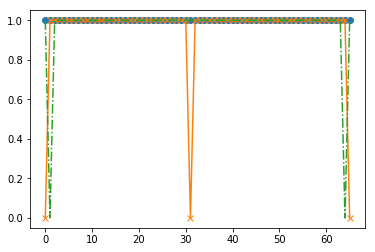

In [329]:
plt.plot(vel_pass, '-o')
plt.plot(acc_pass, '-x')
plt.plot(low_bound_pass, '-.')

In [344]:
len(Qrev_list)

67

In [345]:
# prepare forward and backward waypoints and times
Q_list = trajectory
T_list_accum = np.cumsum(T_list)
T_list_accum_round = np.pad(np.round(T_list_accum / dt_step) * dt_step, (1,0), 'constant', constant_values=0)
T_list_round = T_list_accum_round[1:]-T_list_accum_round[:-1]
idx_move = np.where(T_list_accum_round[1:]-T_list_accum_round[:-1]>dt_step/2)[0]
T_list = np.pad(T_list_round[idx_move], (0,1), 'constant', constant_values = 0)
idx_move = np.pad(idx_move+1, (1,0), 'constant', constant_values = 0)
Q_list = Q_list[idx_move]
Qrev_list = np.array(list(reversed(Q_list)))
Trev_list = list(reversed(T_list[:-1])) + [0]

# re-calculate trajectory with mixed waypoint times
t_all, traj_all = get_traj_all(dt_step, T_list, Q_list)
trev_all, trajrev_all = get_traj_all(dt_step, Trev_list, Qrev_list)
traj_all, trajrev_all = np.array(traj_all), np.array(list(reversed(trajrev_all)))

# weighting values to mix waypoint times, in S curves
traj_len = len(traj_all)
alpha = (np.arange(traj_len).astype(np.float) / (traj_len - 1))[:, np.newaxis]
alpha = (np.cos((alpha + 1) * np.pi) + 1) / 2
beta = 1 - alpha

# mix forward and backward trajectory with S curve weights
traj_tot = beta * traj_all + alpha * trajrev_all

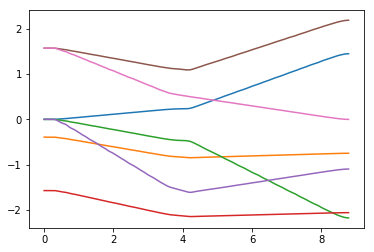

In [346]:
plt.plot(t_all, traj_tot)

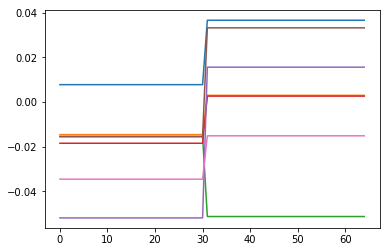

In [347]:
plt.plot(dq_list)

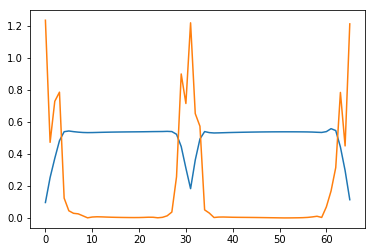

In [348]:
plt.plot(vel_ratio_mid)
plt.plot(acc_ratio)

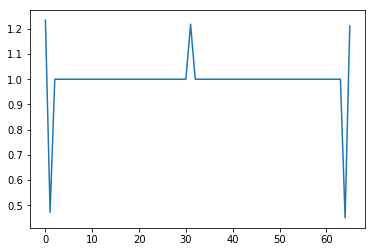

In [349]:
plt.plot(adjust_ratio)

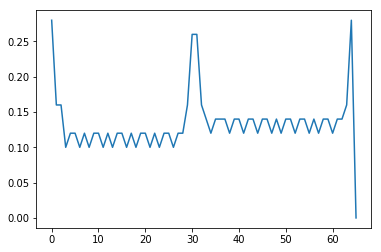

In [350]:
plt.plot(T_list)

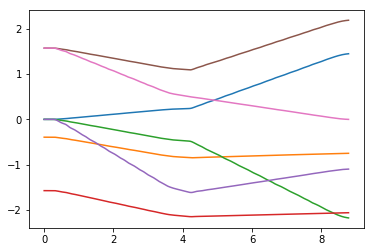

In [351]:
import matplotlib.pyplot as plt
plt.plot(t_all, traj_all)

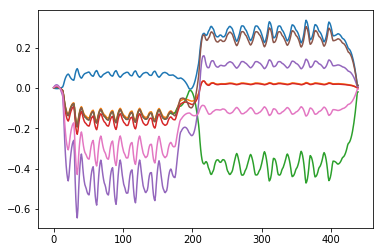

In [359]:
vel_tot = differentiate(traj_tot, 0.02)
plt.plot(vel_tot)

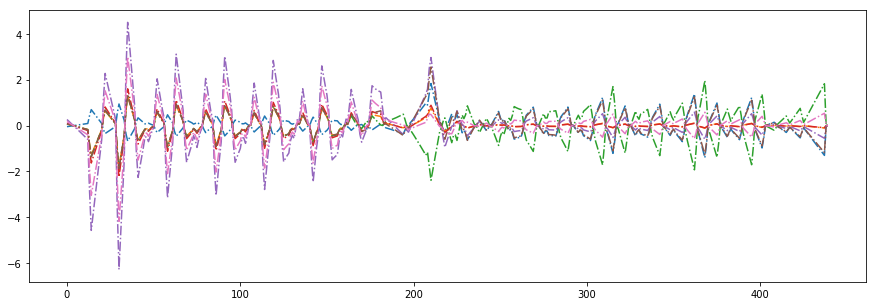

In [360]:
acc_tot = differentiate(vel_tot, 0.02)
plt.figure(figsize=(15,5))
plt.plot(acc_tot,'-.')
# plt.axis([0,500,-1,1])

In [239]:
acc_limits

array([0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816])

In [62]:
print(gtimer)

plan: 	992.0 ms/1 = 991.875 ms (991.875/991.875)
calc_safe_trajectory: 	1442.0 ms/1 = 1442.327 ms (1442.327/1442.327)



In [50]:
print(RobotSpecs.get_vel_limits(RobotType.panda))
print(RobotSpecs.get_acc_limits(RobotType.panda))

[1.30899694 1.30899694 1.30899694 1.30899694 1.57079633 1.57079633
 1.57079633]
[1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633]


In [43]:
dt_step, trajectory, vel_lims, acc_lims =\
    1.0/50, snode_schedule[1].traj[:, 6:],  \
    np.array(RobotSpecs.get_vel_limits(RobotType.panda))*2, \
    np.array(RobotSpecs.get_acc_limits(RobotType.panda))*2

In [44]:
t_all, traj_tot = calc_safe_trajectory(dt_step, trajectory, vel_lims, acc_lims)

In [46]:
gscene.show_motion(np.pad(traj_tot, ((0,0),(6,0)), 'constant', constant_values=0), period=0.001)

In [151]:
vel_lims

array([1.96349541, 1.96349541, 1.96349541, 1.96349541, 2.35619449,
       2.35619449, 2.35619449])

In [145]:
dq_list[-1]

array([-0.04797374,  0.05089752,  0.00817357,  0.01137909,  0.00061158,
        0.00594128,  0.0275943 ])

In [59]:
crob.joint_move_make_sure(crob.home_pose)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)


In [51]:
for i_s, snode in enumerate(snode_schedule):
    print("{}: {}".format(i_s, snode.state.node))

0: ('track_face', 'track_face', 0, 0, 0)
1: ('grip1', 'track_face', 0, 0, 0)
2: ('track_face', 'track_face', 0, 0, 0)
3: ('track_face', 'grip1', 0, 0, 0)
4: ('track_face', 'grip1', 0, 0, 0)
5: ('track_face', 'grip1', 1, 0, 0)
6: ('track_face', 'grip1', 2, 0, 0)
7: ('track_face', 'grip1', 2, 1, 0)
8: ('track_face', 'grip1', 2, 2, 0)
9: ('track_face', 'grip1', 2, 2, 0)
10: ('track_face', 'track_face', 2, 2, 0)
11: ('grip1', 'track_face', 2, 2, 0)
12: ('track_face', 'track_face', 2, 2, 0)
13: ('track_face', 'track_face', 2, 2, 0)
14: ('track_face', 'grip1', 2, 2, 0)
15: ('track_face', 'grip1', 2, 2, 0)
16: ('track_face', 'grip1', 2, 2, 1)
17: ('track_face', 'grip1', 2, 2, 2)
18: ('track_face', 'grip1', 2, 2, 2)
19: ('track_face', 'track_face', 2, 2, 2)
20: ('track_face', 'track_face', 2, 2, 2)


In [49]:
panda.move_joint_wp(snode_schedule[1].traj[:, 6:], 
    vel_lims=[1.0]*7, acc_lims=[1.0]*7)

In [50]:
panda.move_joint_wp(np.array(list(reversed(snode_schedule[1].traj[:, 6:]))), 
    vel_lims=[1.0]*7, acc_lims=[1.0]*7)

In [54]:
np.multiply(RobotSpecs.get_vel_limits(RobotType.panda), 0.5)

array([0.65449847, 0.65449847, 0.65449847, 0.65449847, 0.78539816,
       0.78539816, 0.78539816])

In [56]:
RobotSpecs.get_acc_limits(RobotType.panda)

array([6.28318531, 6.28318531, 6.28318531, 6.28318531, 6.28318531,
       6.28318531, 6.28318531])

In [55]:
np.multiply(RobotSpecs.get_acc_limits(RobotType.panda), 0.5)

array([3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265])